# Anomaly Detection & Time Series

**Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.**

Anomaly detection is the process of identifying data points, events, or observations that deviate significantly from the expected or normal behavior. These deviations are often referred to as anomalies, outliers, or exceptions. Anomaly detection is crucial in various domains, including fraud detection, intrusion detection, medical diagnosis, and industrial fault detection.

There are three main types of anomalies:

1.  **Point Anomalies:** A point anomaly is a single data instance that is significantly different from the rest of the data.
    *   **Example:** A sudden spike in the CPU usage of a server that is usually stable. A transaction with an unusually large amount in a credit card transaction dataset.

2.  **Contextual Anomalies:** A contextual anomaly is a data instance that is considered anomalous within a specific context, but not necessarily otherwise. The context could be temporal, spatial, or any other relevant attribute.
    *   **Example:** Spending \$100 on groceries on a regular day might be normal, but spending \$1000 on groceries in a single day could be a contextual anomaly, considering the usual spending patterns. A low temperature reading in winter is normal, but the same low temperature reading in summer would be a contextual anomaly.

3.  **Collective Anomalies:** A collective anomaly is a set of data instances that are not individually anomalous but are collectively anomalous when considered together. These anomalies often indicate a sequence of events or a pattern that is unusual.
    *   **Example:** A series of failed login attempts from different IP addresses followed by a successful login from an unusual location could be a collective anomaly indicating a potential security breach. A sudden increase in the number of small transactions from a credit card, which individually might not be suspicious, but collectively could indicate fraudulent activity.

**Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.**

Here's a comparison of Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases:

| Feature          | Isolation Forest                                  | DBSCAN (Density-Based Spatial Clustering of Applications with Noise) | Local Outlier Factor (LOF)                          |
|------------------|---------------------------------------------------|----------------------------------------------------------------------|------------------------------------------------------|
| **Approach**     | Tree-based, isolates anomalies by randomly partitioning data and measuring isolation depth. Anomalies are easier to isolate. | Density-based clustering. Defines outliers as points that are in low-density regions compared to their neighbors. | Density-based. Measures the local deviation of density of a given data point with respect to its neighbors. |
| **Mechanism**    | Constructs random isolation trees. Anomalies are isolated closer to the root of the tree (fewer splits needed). | Groups together data points that are closely packed together, marking as outliers points that lie alone in low-density regions. | Calculates the local reachability density (LRD) for each point and compares it to the LRD of its neighbors. A high LOF indicates an outlier. |
| **Complexity**   | Relatively low complexity, efficient for large datasets. O(n log n) on average. | Can be sensitive to parameter choice (epsilon and min_samples). O(n log n) or O(n^2) depending on implementation. | Can be computationally expensive for large datasets. O(n log k) where k is the number of neighbors. |
| **Parameter Tuning** | Fewer parameters to tune (n_estimators, contamination). | Sensitive to epsilon (radius) and min_samples (minimum number of points in a neighborhood). | Sensitive to the number of neighbors (k). |
| **Data Type**    | Works well with numerical data. Can handle high-dimensional data. | Primarily for spatial data, but can be extended to other metrics. Sensitive to scaling. | Works well with numerical data. Sensitive to scaling. |
| **Handling of Different Density Regions** | Can handle datasets with varying densities. | Struggles with datasets of widely varying densities. | Can handle datasets with varying densities, as it is a local measure. |
| **Interpretability** | Relatively easy to interpret the isolation process. | Can be difficult to interpret the density parameters. | The LOF score provides a measure of outlierness. |
| **Suitable Use Cases** | Large datasets, high-dimensional data, general-purpose anomaly detection, fraud detection, network intrusion detection. | Spatial data with well-defined clusters and noise, identifying outliers in geographical data, anomaly detection in images. | Detecting local outliers in datasets with varying densities, identifying anomalies in complex patterns, fraud detection, industrial fault detection. |

In summary:

*   **Isolation Forest** is often preferred for its efficiency with large datasets and ability to handle high-dimensional data.
*   **DBSCAN** is excellent for identifying outliers in spatial data and when clusters are well-defined.
*   **Local Outlier Factor** is effective for detecting local outliers in datasets with varying densities.

**Question 3: What are the key components of a Time Series? Explain each with one example.**

A time series is a sequence of data points collected or recorded at specific time intervals. Analyzing time series data helps in understanding patterns, trends, and seasonality over time. The key components of a time series are:

1.  **Trend:** The long-term movement or direction of the data over time. It represents the underlying pattern of growth or decline in the series.
    *   **Example:** The increasing trend in the global average temperature over the past century.

2.  **Seasonality:** A repeating pattern or cycle that occurs within a fixed period, such as a day, week, month, or year. Seasonality is caused by factors that repeat regularly.
    *   **Example:** The increase in retail sales during the holiday season each year.

3.  **Cyclicality:** Fluctuations that occur over longer periods than seasonality, typically lasting more than a year. Cyclical patterns are not necessarily fixed in length and are often influenced by economic or business cycles.
    *   **Example:** The boom and bust cycles in the stock market.

4.  **Irregularity (Noise):** Random fluctuations or unpredictable events that cannot be explained by trend, seasonality, or cyclicality. These are often short-term and do not follow a discernible pattern.
    *   **Example:** A sudden drop in sales due to an unexpected natural disaster.

5.  **Stationarity:** A time series is said to be stationary if its statistical properties (mean, variance, and autocorrelation) remain constant over time. Stationarity is an important assumption for many time series forecasting models.
    *   **Example:** White noise, where the data points are independent and identically distributed with a constant mean and variance.

**Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?**

**Stationarity in Time Series:**

A time series is said to be **stationary** if its statistical properties—mean, variance, and autocorrelation—remain constant over time. In simpler terms, a stationary time series doesn't have a trend, seasonality, or other time-dependent patterns that would affect the future values in a predictable way based on their position in the series.

Why is stationarity important? Many time series analysis and forecasting methods assume that the underlying process generating the data is stationary. If the data is non-stationary, these methods may produce inaccurate or unreliable results.

**Testing for Stationarity:**

There are several ways to test for stationarity:

1.  **Visual Inspection:** Plotting the time series data can often reveal trends, seasonality, or changing variance. While not a rigorous statistical test, it's a good first step.
2.  **Summary Statistics:** Comparing the mean and variance of different segments of the time series can provide clues about stationarity. If these statistics differ significantly across segments, the series is likely non-stationary.
3.  **Statistical Tests:** More formal statistical tests can be used to determine stationarity. Two common tests are:
    *   **Augmented Dickey-Fuller (ADF) Test:** This is a unit root test that checks if a time series has a unit root, which would indicate non-stationarity. The null hypothesis of the ADF test is that there is a unit root (non-stationary). A low p-value (typically less than 0.05) leads to the rejection of the null hypothesis, suggesting that the series is stationary.
    *   **Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test:** This test is also a unit root test, but its null hypothesis is that the time series is stationary. A low p-value (typically less than 0.05) leads to the rejection of the null hypothesis, suggesting that the series is non-stationary.

**Transforming Non-Stationary Series into Stationary Ones:**

If a time series is found to be non-stationary, various transformations can be applied to make it stationary:

1.  **Differencing:** This involves computing the difference between consecutive observations. First-order differencing removes a linear trend, while second-order differencing can remove quadratic trends. Seasonal differencing (differencing by the seasonal period) can remove seasonality.
    *   **Example:** If you have a time series $Y_t$, the first-order differenced series is $Y'_t = Y_t - Y_{t-1}$.
2.  **Transformation:** Applying mathematical transformations like logarithms or square roots can help stabilize the variance of a time series if it is changing over time. Log transformation is particularly useful for time series with exponential growth and increasing variance.
3.  **Decomposition:** Decomposing a time series into its components (trend, seasonality, and residual) allows you to analyze and model the stationary residual component. The trend and seasonality components can then be modeled separately or removed.
4.  **Detrending and Deseasonalizing:** Explicitly removing the estimated trend and seasonal components from the time series can result in a stationary series.

The choice of transformation depends on the specific characteristics of the non-stationarity (e.g., trend, seasonality, changing variance). It's often an iterative process of applying transformations and testing for stationarity until the series becomes approximately stationary.

**Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.**


Here's a differentiation between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application:

| Model    | Structure                                                                 | Key Components                                                                 | Application                                                                                                   |
|----------|---------------------------------------------------------------------------|--------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------|
| **AR(p)** | Autoregressive model of order p. The current value is a linear combination of past p values and a random error term. | Depends on past values of the series.                                       | Modeling time series where the current value is dependent on previous values.                               |
| **MA(q)** | Moving Average model of order q. The current value is a linear combination of past q error terms and a random error term. | Depends on past error terms (shocks).                                      | Modeling time series where the current value is dependent on past shocks or random fluctuations.               |
| **ARIMA(p, d, q)** | Autoregressive Integrated Moving Average model. Combines AR, I, and MA components. | AR(p), Integrated (d), MA(q). 'd' is the order of differencing to make the series stationary. | Modeling non-stationary time series by first differencing to achieve stationarity, then applying AR and MA components. |
| **SARIMA(p, d, q)(P, D, Q)s** | Seasonal Autoregressive Integrated Moving Average model. Extends ARIMA to handle seasonality. | ARIMA(p, d, q) for non-seasonal components and (P, D, Q)s for seasonal components. 's' is the seasonal period. | Modeling time series with both non-seasonal and seasonal patterns.                                             |
| **SARIMAX(p, d, q)(P, D, Q)s** | Seasonal Autoregressive Integrated Moving Average model with eXogenous variables. Extends SARIMA by including external predictor variables. | SARIMA components plus exogenous variables.                                    | Modeling time series with both non-seasonal and seasonal patterns, and where external factors influence the series. |

**In more detail:**

*   **AR (Autoregressive):** This model assumes that the current value of a time series can be explained as a linear combination of its past values and a random error term. The order 'p' indicates how many past values are used. It's suitable for time series where there's a direct dependence on previous observations.

*   **MA (Moving Average):** This model assumes that the current value of a time series is a linear combination of past error terms (also known as shocks or random disturbances) and a current random error term. The order 'q' indicates how many past error terms are included. It's suitable for time series where the current value is influenced by past unpredictable events.

*   **ARIMA (Autoregressive Integrated Moving Average):** This model is used for non-stationary time series. The "I" (Integrated) part indicates that the time series has been differenced 'd' times to make it stationary before applying the AR and MA components. The parameters (p, d, q) represent the order of the AR, differencing, and MA components, respectively.

*   **SARIMA (Seasonal Autoregressive Integrated Moving Average):** This model is an extension of ARIMA that specifically handles seasonality in time series data. It includes additional seasonal terms (P, D, Q) and a seasonal period 's'. The (p, d, q) terms model the non-seasonal part, while the (P, D, Q)s terms model the seasonal part.

*   **SARIMAX (Seasonal Autoregressive Integrated Moving Average with eXogenous variables):** This is the most comprehensive model among the ones listed. It builds upon SARIMA by incorporating exogenous (external) variables that can influence the time series. This allows for modeling the impact of other factors, such as economic indicators or holidays, on the time series.

Choosing the appropriate model depends on the characteristics of the time series data, including the presence of trends, seasonality, and the influence of external factors.

**Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components**

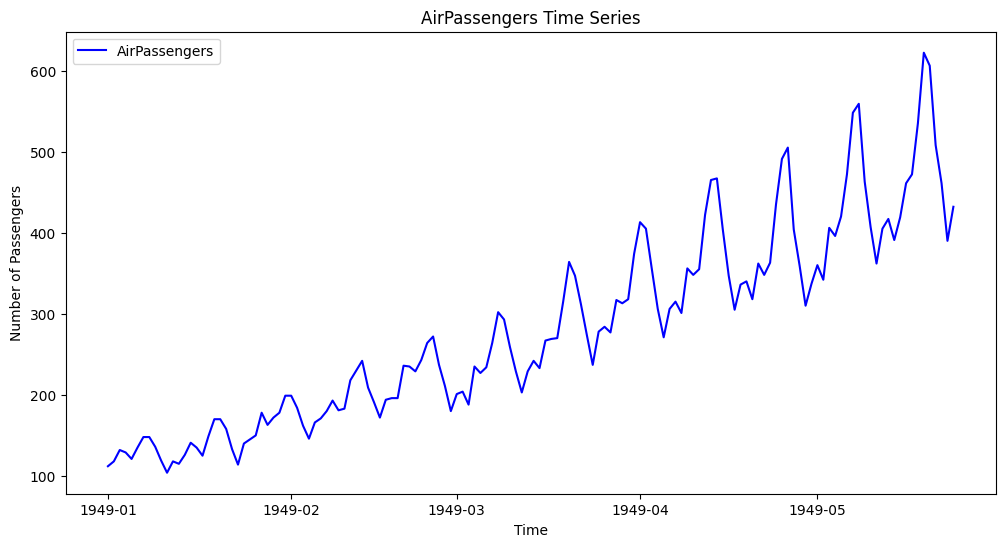

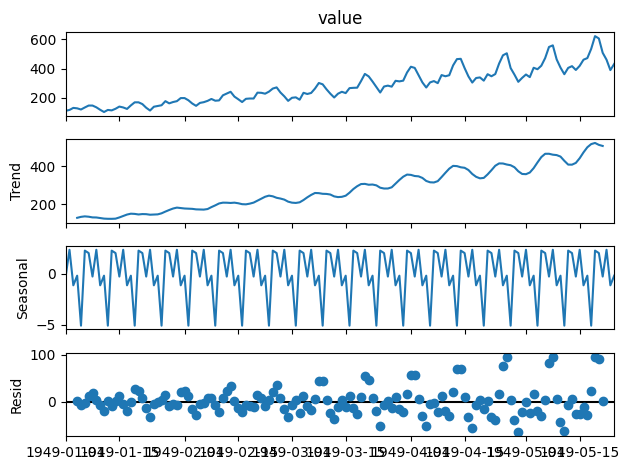

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset
# Load the AirPassengers dataset
air_passengers = get_rdataset("AirPassengers", "datasets").data
air_passengers['time'] = pd.date_range(start='1949-01-01', periods=len(air_passengers))
# Set the time column as the index
air_passengers.set_index('time', inplace=True)
# Plot the original series
plt.figure(figsize=(12, 6))
plt.plot(air_passengers['value'], label='AirPassengers', color='blue')
plt.title('AirPassengers Time Series')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()
# Decompose the time series
decomposition = seasonal_decompose(air_passengers['value'], model='additive')
# Plot the decomposed components
decomposition.plot()
plt.tight_layout()
plt.show()

**Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.**

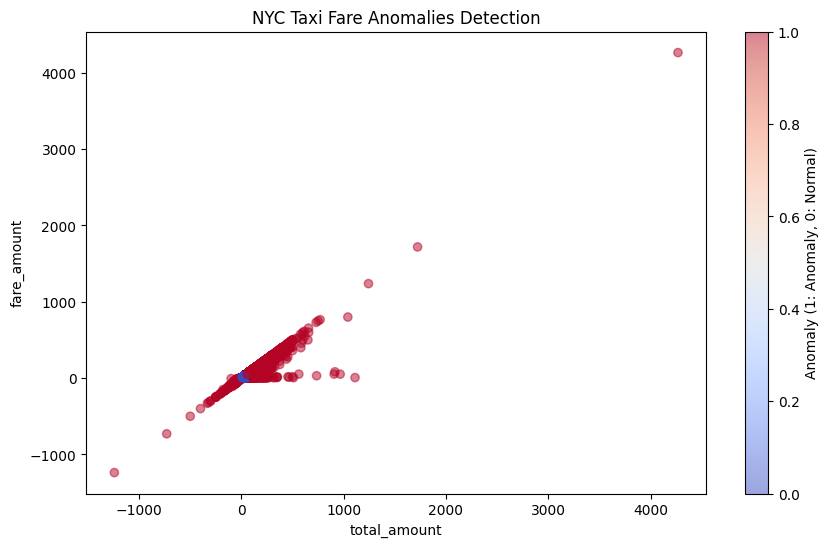

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import IsolationForest
import numpy as np
# Load the NYC Taxi Fare dataset
nyc_taxi_fare = pd.read_csv("NYC_taxi_fare_data.csv")

# Select relevant features for anomaly detection
features = nyc_taxi_fare[['total_amount', 'fare_amount']].dropna()
# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(features)
# Predict anomalies
nyc_taxi_fare['anomaly'] = iso_forest.predict(features)
# Convert -1 to 1 for anomalies and 1 to 0 for normal points
nyc_taxi_fare['anomaly'] = np.where(nyc_taxi_fare['anomaly'] == -1, 1, 0)
# Plot the anomalies on a 2D scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(nyc_taxi_fare['total_amount'], nyc_taxi_fare['fare_amount'], 
            c=nyc_taxi_fare['anomaly'], cmap='coolwarm', alpha=0.5)
plt.title('NYC Taxi Fare Anomalies Detection')
plt.xlabel('total_amount')
plt.ylabel('fare_amount')
plt.colorbar(label='Anomaly (1: Anomaly, 0: Normal)')
plt.show()

**Question 8: Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results**

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


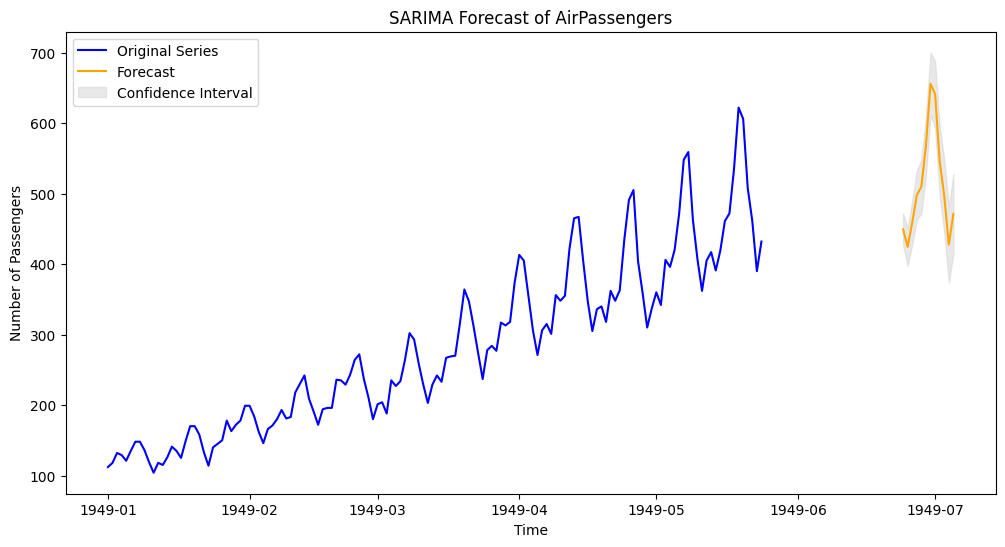

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.datasets import get_rdataset
# Load the AirPassengers dataset
air_passengers = get_rdataset("AirPassengers", "datasets").data
air_passengers['time'] = pd.date_range(start='1949-01-01', periods=len(air_passengers))
air_passengers.set_index('time', inplace=True)  # Set 'time' as index

# Define the SARIMA model parameters
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, s)

# Fit the SARIMA model
sarima_model = SARIMAX(air_passengers['value'], order=order, seasonal_order=seasonal_order,freq='D')
sarima_fit = sarima_model.fit(disp=False)

# Forecast the next 12 months
forecast = sarima_fit.get_forecast(steps=12)
forecast_index = pd.date_range(start=air_passengers.index[-1] + pd.DateOffset(months=1), periods=12,freq='D')
forecast_values = forecast.predicted_mean

# Plot the original series and the forecast
plt.figure(figsize=(12, 6))
plt.plot(air_passengers['value'], label='Original Series', color='blue')
plt.plot(forecast_index, forecast_values, label='Forecast', color='orange')
plt.fill_between(forecast_index, 
                 forecast.conf_int().iloc[:, 0], 
                 forecast.conf_int().iloc[:, 1], 
                 color='lightgray', alpha=0.5, label='Confidence Interval')
plt.title('SARIMA Forecast of AirPassengers')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

**Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.**

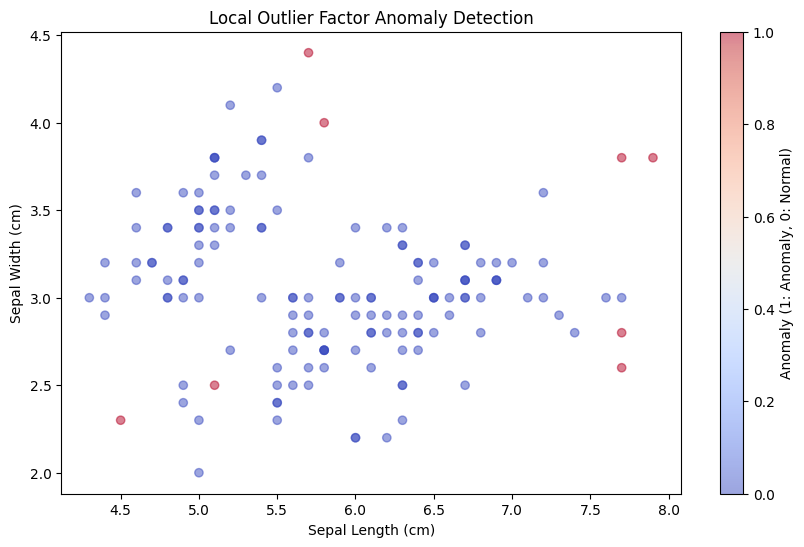

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
# Load a numerical dataset (e.g., Iris dataset)
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Fit Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
data['anomaly'] = lof.fit_predict(data)
# Convert -1 to 1 for anomalies and 1 to 0 for normal points
data['anomaly'] = data['anomaly'].map({-1: 1, 1: 0})
# Plot the anomalies
plt.figure(figsize=(10, 6))
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], 
            c=data['anomaly'], cmap='coolwarm', alpha=0.5)
plt.title('Local Outlier Factor Anomaly Detection')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.colorbar(label='Anomaly (1: Anomaly, 0: Normal)')
plt.show()

**Question 10: You are working as a data scientist for a power grid monitoring company.Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes featureslike timestamp, region, weather conditions, and energy usage.**

**Explain your real-time data science workflow:**

**● How would you detect anomalies in this streaming data (Isolation Forest / LOF / DBSCAN)?**

**● Which time series model would you use for short-term forecasting (ARIMA /SARIMA / SARIMAX)?**

**● How would you validate and monitor the performance over time?**

**● How would this solution help business decisions or operations?**


**● How would you detect anomalies in this streaming data (Isolation Forest / LOF / DBSCAN)?**

**Data Ingestion and Preprocessing:**
Real-time energy consumption data, along with timestamp, region, and weather conditions, would be ingested from sensors and other sources into a streaming data platform (e.g., Apache Kafka, AWS Kinesis).
Data would be preprocessed in real-time, including handling missing values, data type conversions, and potential feature engineering (eg., creating time-based features like hour of day, day of week).

**Real-Time Anomaly Detection:**
For real-time anomaly detection in streaming data, Isolation Forest would be a suitable choice among the options provided (Isolation Forest, LOF, DBSCAN).

**Reasoning:**
Isolation Forest is generally more efficient and scalable for high-dimensional data and large datasets compared to LOF and DBSCAN. In a real-time streaming scenario with potentially high data volume, efficiency is crucial.
Isolation Forest works by isolating anomalies rather than profiling normal data, which can be advantageous in detecting unforeseen anomalies.
While DBSCAN is good for spatial data, this problem involves time series data and features like weather, making a density-based spatial clustering approach less directly applicable without significant feature transformation.
LOF is a local method and can be computationally more expensive for large-scale real-time applications.
The Isolation Forest model would be trained on a historical dataset of normal energy consumption patterns.
As new data streams in, the model would score each incoming data point based on its "anomaly score." A predefined threshold would trigger an alert for data points with scores exceeding that threshold, indicating a potential anomaly (spike or drop).

**● Which time series model would you use for short-term forecasting (ARIMA /SARIMA / SARIMAX)?**

**Short-Term Energy Demand Forecasting:**
For short-term energy demand forecasting, SARIMAX (Seasonal Autoregressive Integrated Moving Average with eXogenous variables) would be the most appropriate time series model among ARIMA, SARIMA, and SARIMAX.
Reasoning:
Energy demand data typically exhibits both non-seasonal patterns (e.g., daily trends) and seasonal patterns (e.g., weekly or yearly cycles). SARIMA is capable of modeling both.
Crucially, the dataset includes exogenous variables like "region" and "weather conditions." These external factors significantly influence energy demand. SARIMAX can incorporate these exogenous variables into the model, leading to more accurate forecasts compared to ARIMA or SARIMA, which only consider the historical time series data itself.
The SARIMAX model would be trained on historical energy demand data and the corresponding exogenous variables.
The model would generate short-term forecasts (e.g., for the next few hours or day) based on the incoming real-time data and forecasted or real-time exogenous variable values

**● How would you validate and monitor the performance over time?**

**Monitoring Performance Over Time:**
Continuous Monitoring: The performance of both models needs to be continuously monitored in real-time.
Anomaly Detection: Monitor the rate of detected anomalies. A sudden increase in alerts could indicate a problem with the model or significant changes in the underlying data distribution. False positive and false negative rates should be tracked and analyzed.

Forecasting: Monitor the forecasting errors (e.g., MAE, RMSE, MAPE) over time. If the errors consistently increase, it suggests the model's performance is degrading.

Data Drift Detection: Implement mechanisms to detect data drift, where the distribution of the incoming data changes over time. This could be due to changes in consumption patterns, new infrastructure, or sensor issues. Data drift can negatively impact model performance.
Automated Retraining: Based on performance monitoring and data drift detection, implement automated retraining of the models using recent data to adapt to changing patterns.
Alerting: Set up alerts to notify operators or data scientists when model performance degrades significantly or when unusual patterns are detected in monitoring metrics

**● How would this solution help business decisions or operations?**

Business Decisions and Operations Impact:
  - Proactive Anomaly Response: Real-time anomaly detection allows the power grid company to quickly identify and respond to abnormal spikes or drops in energy usage. This can help in:
   1. Identifying equipment malfunctions: Sudden drops could indicate faulty sensors or equipment.
   2. Detecting illegal siphoning: Unusual spikes could be indicative of unauthorized connections.
   3. Preventing blackouts/brownouts: Identifying potential overload situations early allows for load balancing or other preventative measures.
   4. Optimizing power distribution: Understanding anomalies helps in better managing the flow of electricity.
   5. Improved Resource Allocation: Accurate short-term energy demand forecasts enable the company to:
   6. Optimize power generation: Ensure enough power is generated to meet demand without excessive overproduction.
   7. Plan for peak loads: Prepare for periods of high demand to avoid strain on the grid.
   8. Manage energy storage: Make informed decisions about charging and discharging energy storage systems.
   9. Optimize maintenance schedules: Plan maintenance during periods of low forecasted demand.
   10. Cost Reduction: By optimizing generation, distribution, and maintenance, the company can reduce operational costs.
   11. Increased Reliability: Proactive anomaly detection and accurate forecasting contribute to a more stable and reliable power grid, reducing the risk of outages.
   12. Informed Decision-Making: The insights gained from anomaly detection and forecasting provide valuable information for long-term planning, infrastructure investments, and   pricing strategies.